In [22]:
!pip install requests beautifulsoup4 lxml


In [19]:
!pip install requests beautifulsoup4 lxml pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 133.1 MB/s eta 0:00:00


In [15]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 137.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 153.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 157.1 MB/s eta 0:00:00


In [3]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 132.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 193.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 185.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=e3de90558dda096d87aa09e74f12428ab05f5e2f176f1abfb43a04d25b9f3f73
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


## Question 1: Use yfinance to Extract Stock Data


In [4]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
soup = BeautifulSoup(requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text, "html.parser")

table = soup.find_all("table")[1]
tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != "$-"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)

tesla_revenue.tail()  # 📸 Take screenshot of this


/tmp/ipykernel_768/115615255.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


,Date,Revenue
59,2010-06-30,28.0
60,2010-03-31,21.0
61,2009-12-31,NaN
62,2009-09-30,46.0
63,2009-06-30,27.0


## Question 3: Use yfinance to Extract GameStop Stock Data


In [11]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GameStop Revenue Data


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
soup = BeautifulSoup(requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text, "html.parser")

table = soup.find_all("table")[1]
gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != "$-"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)

gme_revenue.tail()  # 📸 Take screenshot of this


/tmp/ipykernel_768/199321048.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


,Date,Revenue
61,2010-01-31,3524.0
62,2009-10-31,1835.0
63,2009-07-31,1739.0
64,2009-04-30,1981.0
65,2009-01-31,3492.0


## Question 5: Tesla Stock and Revenue Graph


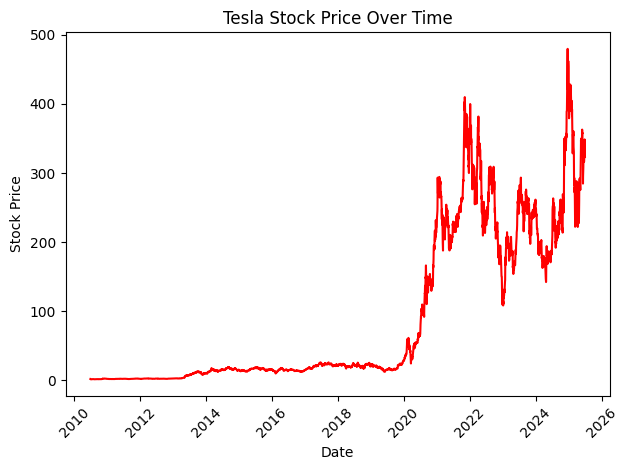

In [16]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock, color='blue'):
    fig, ax1 = plt.subplots()
    ax1.plot(stock_data['Date'], stock_data['Close'], color=color)
    ax1.set_title(f"{stock} Stock Price Over Time")
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla', color='red')


## Question 6: GameStop Stock and Revenue Graph


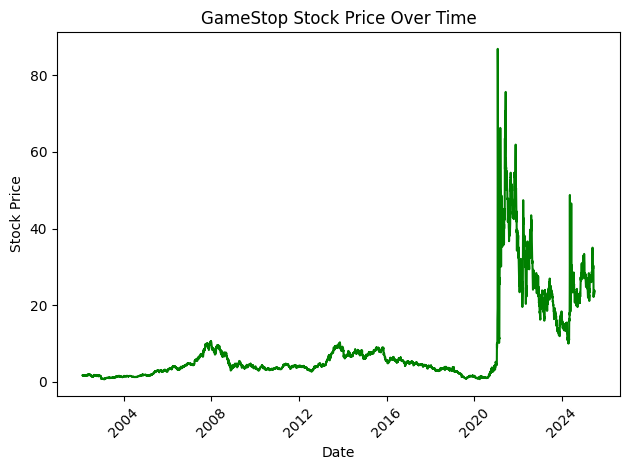

In [25]:
make_graph(gme_data, gme_revenue, 'GameStop', color='green')
